In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image

# link to images "./srgan-torch/data/img_align_celeba"

In [2]:
# Đọc file attributes và danh sách ảnh
attr_file = 'list_attr_celeba.csv'
df_attr = pd.read_csv(attr_file, delimiter=',')

# Hiển thị 5 dòng đầu tiên của dataset
df_attr.head()


image_id  5_o_Clock_Shadow  Arched_Eyebrows  Attractive  Bags_Under_Eyes  \
0  000001.jpg                -1                1           1               -1   
1  000002.jpg                -1               -1          -1                1   
2  000003.jpg                -1               -1          -1               -1   
3  000004.jpg                -1               -1           1               -1   
4  000005.jpg                -1                1           1               -1   

   Bald  Bangs  Big_Lips  Big_Nose  Black_Hair  ...  Sideburns  Smiling  \
0    -1     -1        -1        -1          -1  ...         -1        1   
1    -1     -1        -1         1          -1  ...         -1        1   
2    -1     -1         1        -1          -1  ...         -1       -1   
3    -1     -1        -1        -1          -1  ...         -1       -1   
4    -1     -1         1        -1          -1  ...         -1       -1   

   Straight_Hair  Wavy_Hair  Wearing_Earrings  Wearing_Hat  Wearing_Lipstick  \
0              1         -1                 1           -1                 1   
1             -1         -1                -1           -1                -1   
2             -1          1                -1           -1                -1   
3              1         -1                 1           -1                 1   
4             -1         -1                -1           -1                 1   

   Wearing_Necklace  Wearing_Necktie  Young  
0                -1               -1      1  
1                -1               -1      1  
2                -1               -1      1  
3                 1               -1      1  
4                -1               -1      1  

[5 rows x 41 columns]

In [3]:

# Kiểm tra kích thước của dataset
print(f'Số lượng ảnh: {df_attr.shape[0]}, Số thuộc tính: {df_attr.shape[1]}')

Số lượng ảnh: 202599, Số thuộc tính: 41


In [4]:
# Kiểm tra danh sách thuộc tính
print(df_attr.columns)

Index(['image_id', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
       'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns',
       'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
       'Wearing_Necktie', 'Young'],
      dtype='object')


       5_o_Clock_Shadow  Arched_Eyebrows    Attractive  Bags_Under_Eyes  \
count     202599.000000    202599.000000  202599.00000    202599.000000   
mean          -0.777728        -0.466039       0.02501        -0.590857   
std            0.628602         0.884766       0.99969         0.806778   
min           -1.000000        -1.000000      -1.00000        -1.000000   
25%           -1.000000        -1.000000      -1.00000        -1.000000   
50%           -1.000000        -1.000000       1.00000        -1.000000   
75%           -1.000000         1.000000       1.00000        -1.000000   
max            1.000000         1.000000       1.00000         1.000000   

                Bald          Bangs       Big_Lips       Big_Nose  \
count  202599.000000  202599.000000  202599.000000  202599.000000   
mean       -0.955113      -0.696849      -0.518408      -0.530935   
std         0.296241       0.717219       0.855135       0.847414   
min        -1.000000      -1.000000      -1.0000

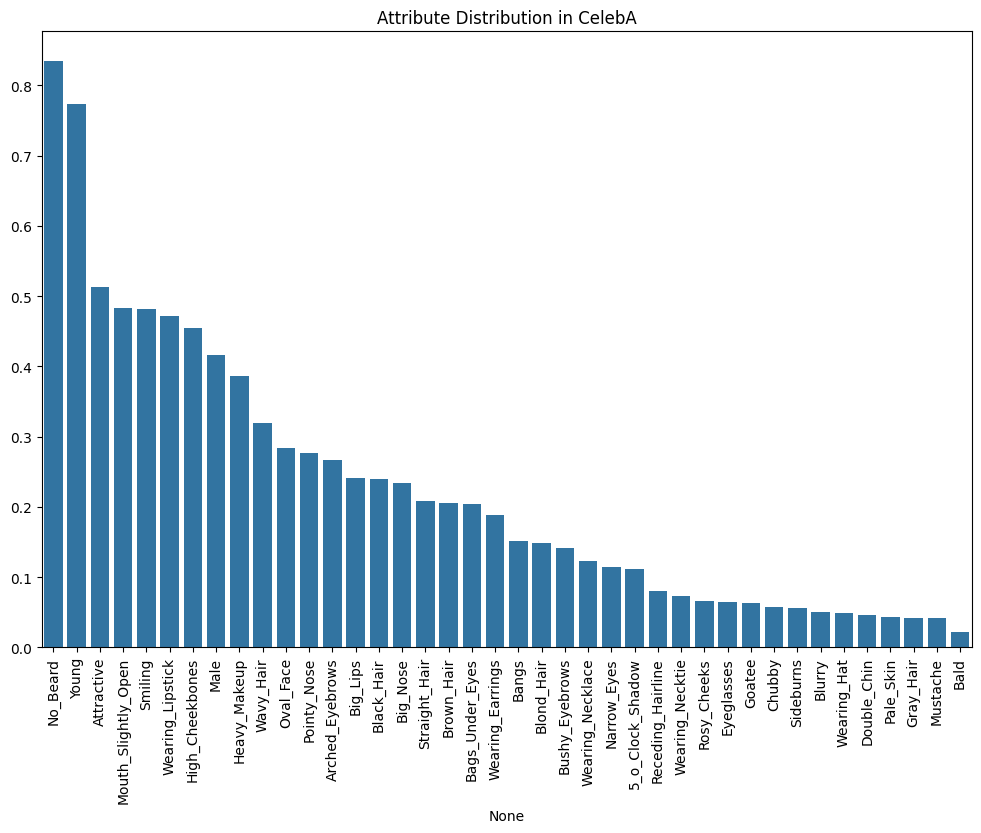

In [5]:
# Thống kê mô tả cho toàn bộ các thuộc tính
print(df_attr.describe())

# Tính toán tỷ lệ các thuộc tính dương và âm
attribute_distribution = (df_attr.drop("image_id", axis=1) == 1).mean()
attribute_distribution.sort_values(ascending=False, inplace=True)
print(attribute_distribution)

# Vẽ biểu đồ phân phối các thuộc tính
plt.figure(figsize=(12, 8))
sns.barplot(x=attribute_distribution.index, y=attribute_distribution.values)
plt.xticks(rotation=90)
plt.title('Attribute Distribution in CelebA')
plt.show()


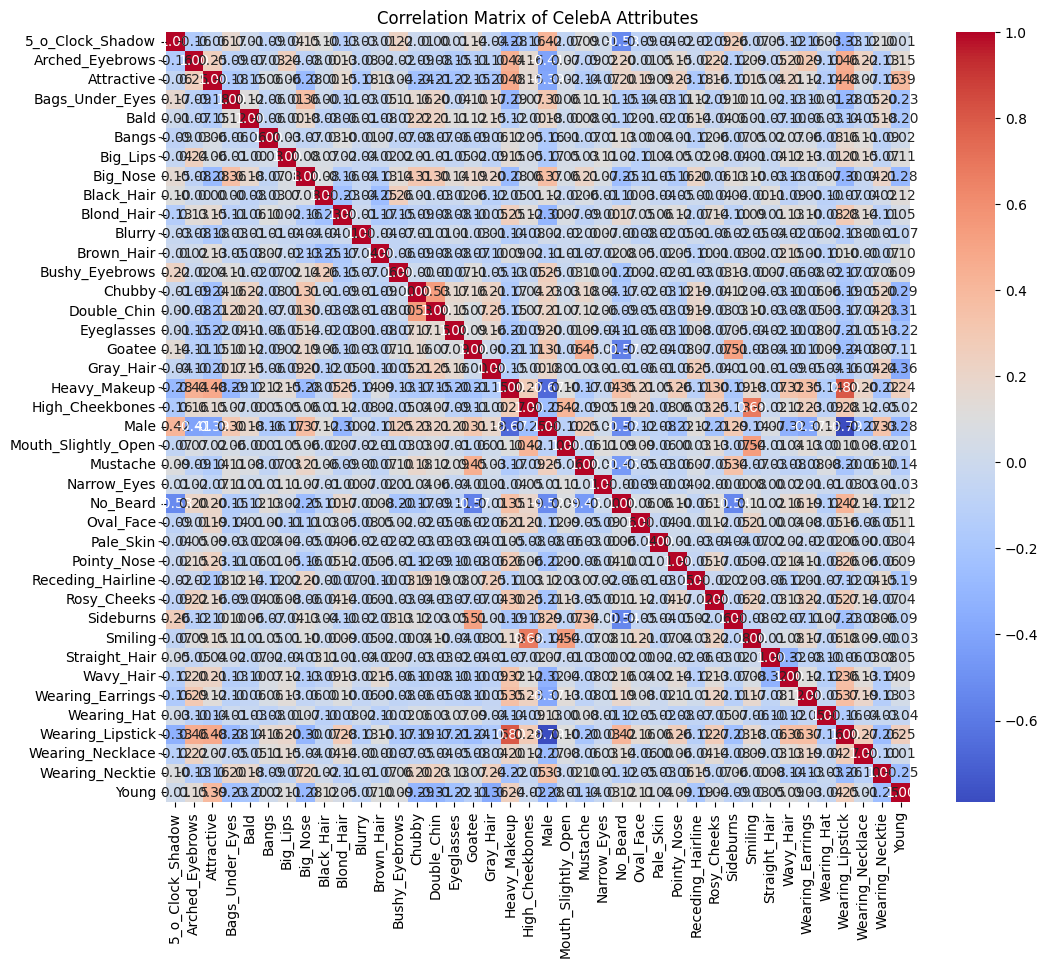

In [6]:
# Loại bỏ cột image_id
df_attr = df_attr.drop(columns=['image_id'])

# Tính toán ma trận tương quan
correlation_matrix = df_attr.corr()

# Vẽ heatmap cho ma trận tương quan
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of CelebA Attributes')
plt.show()

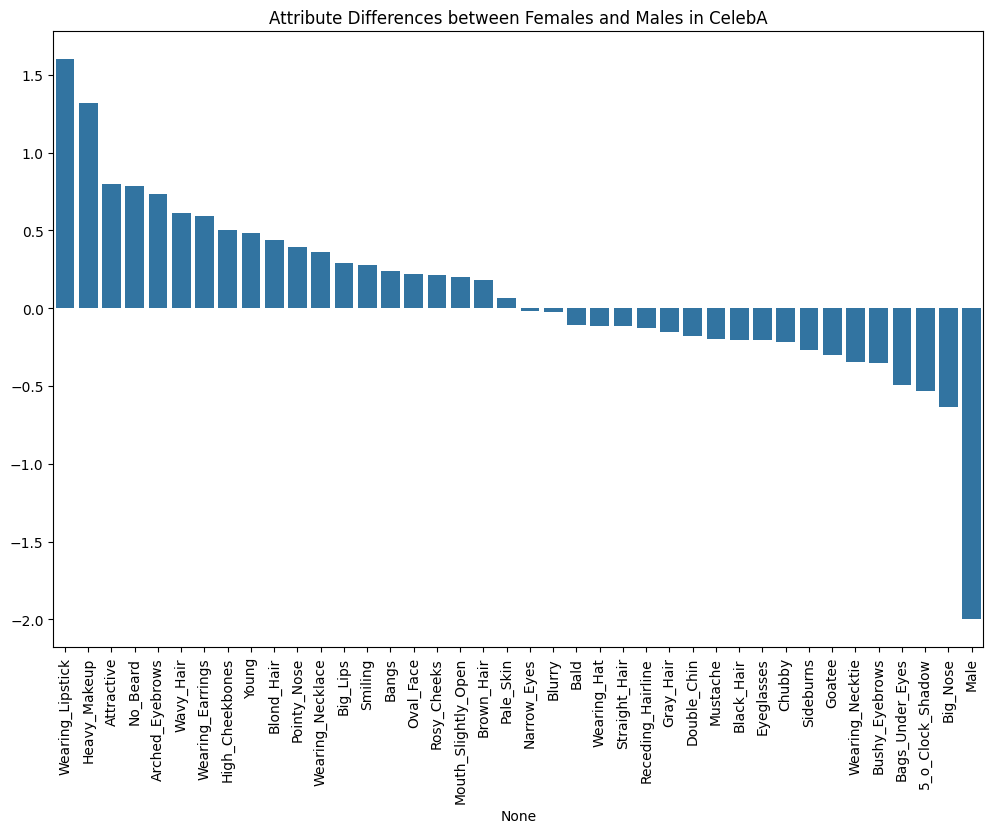

In [7]:
# Tạo các nhóm theo giới tính
male_df = df_attr[df_attr['Male'] == 1]
female_df = df_attr[df_attr['Male'] == -1]

# Tính toán trung bình các thuộc tính theo giới tính
male_attr_mean = male_df.mean()
female_attr_mean = female_df.mean()

# So sánh các thuộc tính giữa nam và nữ
attr_diff = female_attr_mean - male_attr_mean
attr_diff.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(12, 8))
sns.barplot(x=attr_diff.index, y=attr_diff.values)
plt.xticks(rotation=90)
plt.title('Attribute Differences between Females and Males in CelebA')
plt.show()


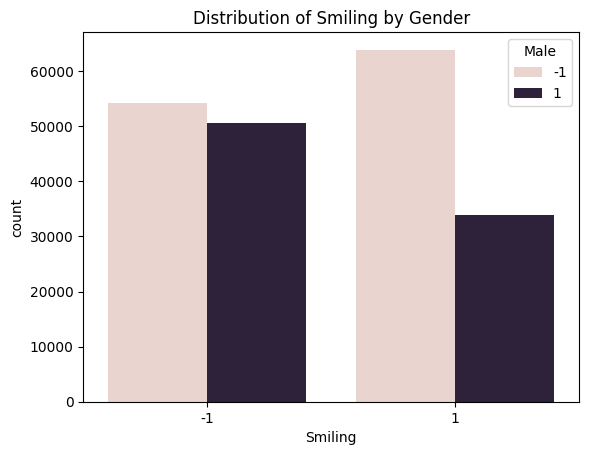

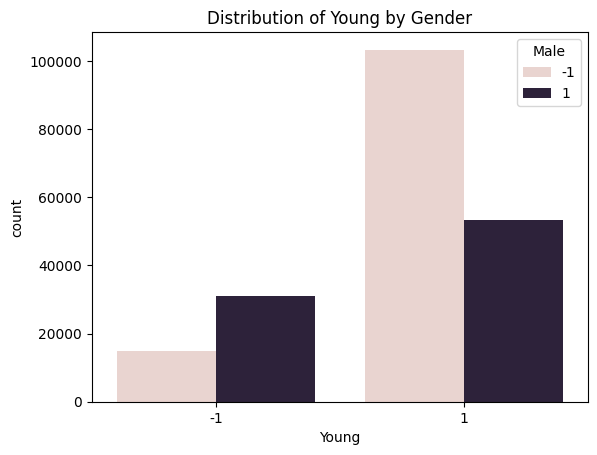

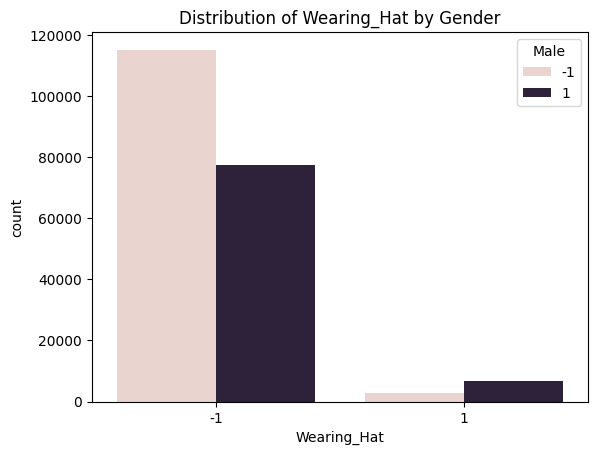

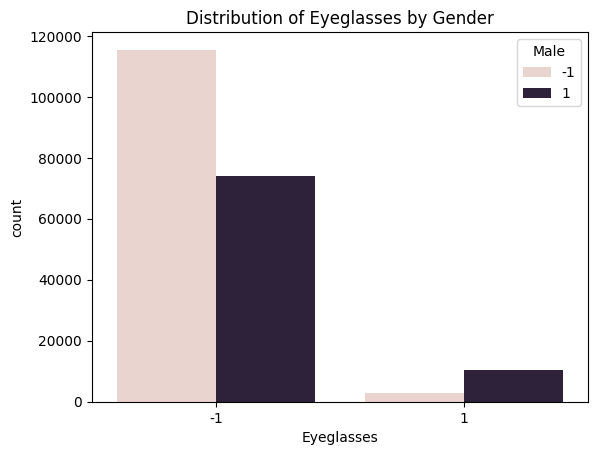

In [8]:
# Kiểm tra sự phân bố của một vài thuộc tính cụ thể
specific_attributes = ['Smiling', 'Young', 'Wearing_Hat', 'Eyeglasses']

for attr in specific_attributes:
    sns.countplot(x=attr, hue='Male', data=df_attr)
    plt.title(f'Distribution of {attr} by Gender')
    plt.show()


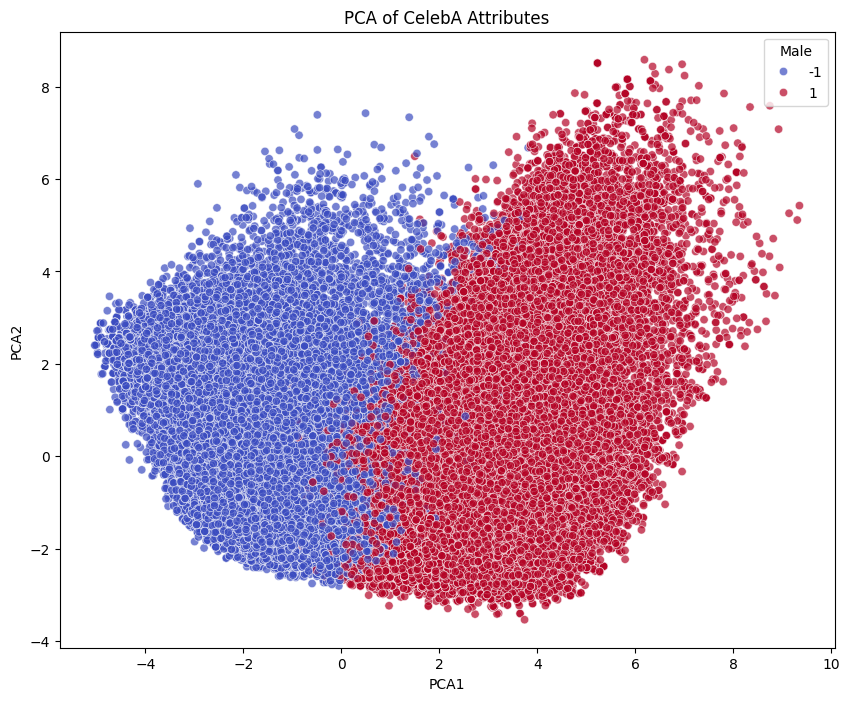

Explained variance by PCA components: [0.15222047 0.07108016]


In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Chuẩn hóa dữ liệu
features = df_attr.iloc[:, 1:]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Áp dụng PCA để giảm số chiều
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_scaled)

# Đưa kết quả PCA vào dataframe để hiển thị
df_attr['PCA1'] = pca_result[:, 0]
df_attr['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Male', data=df_attr, palette='coolwarm', alpha=0.7)
plt.title('PCA of CelebA Attributes')
plt.show()

# Kiểm tra tầm quan trọng của từng thành phần chính
print(f'Explained variance by PCA components: {pca.explained_variance_ratio_}')


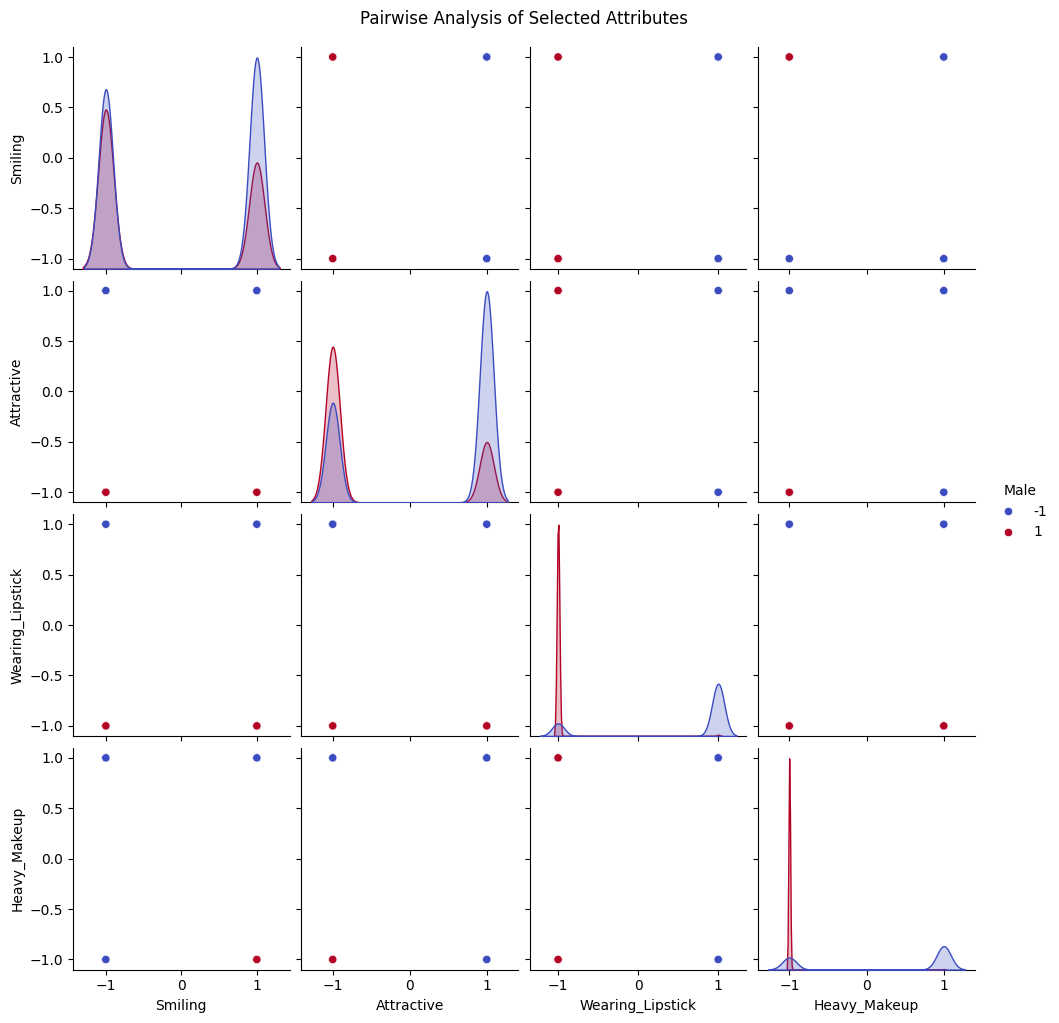

In [10]:
# Chọn một vài cặp thuộc tính để kiểm tra
pair_attrs = ['Smiling', 'Attractive', 'Wearing_Lipstick', 'Heavy_Makeup']

# Tạo các cặp thuộc tính
sns.pairplot(df_attr, vars=pair_attrs, hue='Male', palette='coolwarm')
plt.suptitle('Pairwise Analysis of Selected Attributes', y=1.02)
plt.show()


In [11]:
# print out some examples

attr_dist_top3 = attribute_distribution.head(3)
attr_dist_bot3 = attribute_distribution.tail(3)

In [12]:
# Đọc file attributes và danh sách ảnh
attr_file = 'list_attr_celeba.csv'
df_attr_nueva = pd.read_csv(attr_file, delimiter=',')

Feature: No_Beard


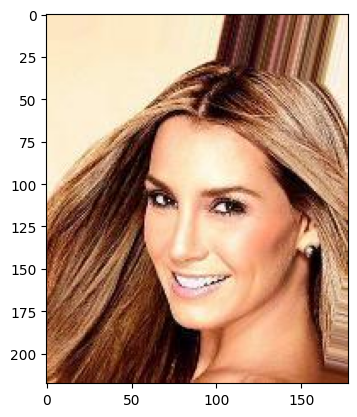

Success 000001.jpg


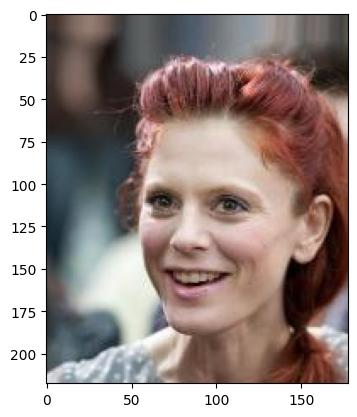

Success 000002.jpg


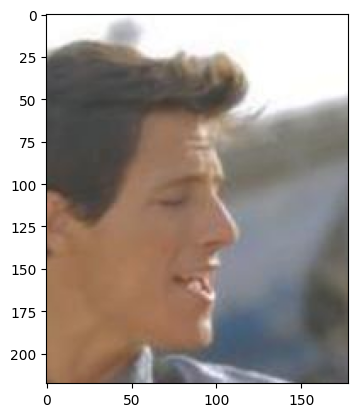

Success 000003.jpg
['000001.jpg', '000002.jpg', '000003.jpg']
Feature: Young


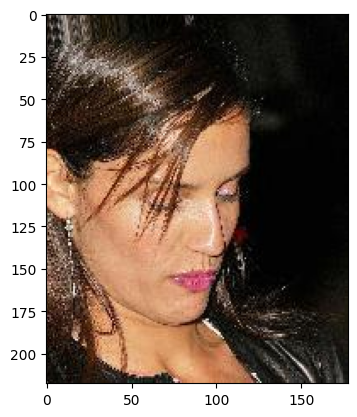

Success 000004.jpg


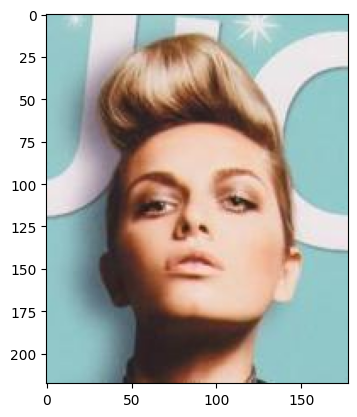

Success 000005.jpg


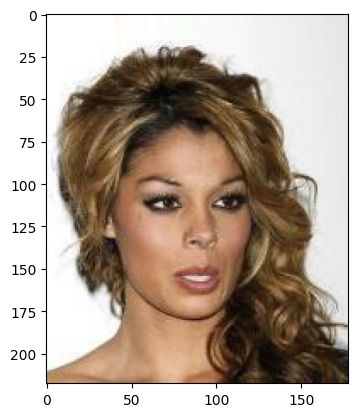

Success 000006.jpg
['000004.jpg', '000005.jpg', '000006.jpg']
Feature: Attractive


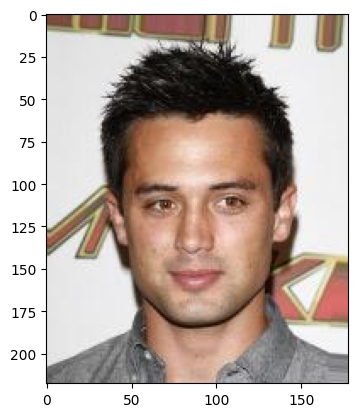

Success 000007.jpg


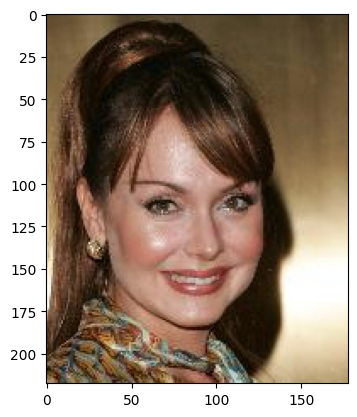

Success 000009.jpg


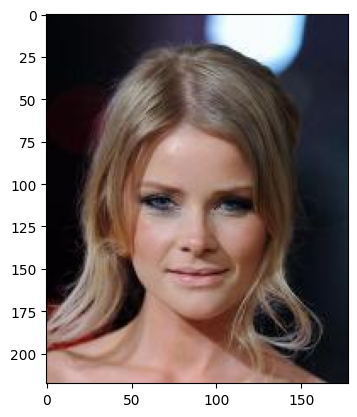

Success 000010.jpg
['000007.jpg', '000009.jpg', '000010.jpg']


<Figure size 640x480 with 0 Axes>

In [16]:
# Show images
from PIL import Image 
import cv2
import os

used_ids = []
img_folder_path = "/N/slate/tnn3/TruongChu/SRGAN/srgan-torch/data/img_align_celeba"

for feature, _ in attr_dist_top3.items():
    indices = df_attr_nueva.loc[df_attr_nueva[feature] == 1]["image_id"]
    
    plot_ids = []

    print(f"Feature: {feature}")

    for id_plot in indices:
        if not id_plot in used_ids:
            used_ids.append(id_plot)
            
            try:
                im = Image.open(os.path.join(img_folder_path, id_plot))
                img = np.asarray(im)
                img_plot = plt.imshow(img)
                plt.show()
                plt.clf()
                #im.show()
                print("Success", id_plot)
                plot_ids.append(id_plot)
            except Exception as e:
                pass

        if len(plot_ids) >= 3:
            break

    print(plot_ids)

Feature: Gray_Hair


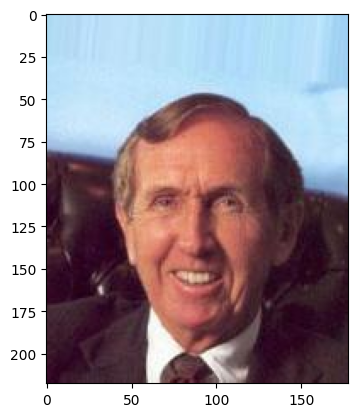

Success 000021.jpg


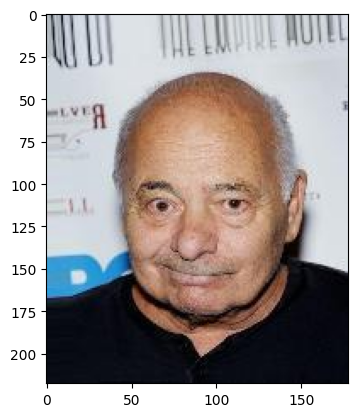

Success 000051.jpg


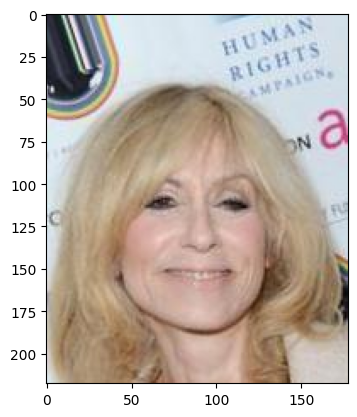

Success 000094.jpg
['000021.jpg', '000051.jpg', '000094.jpg']
Feature: Mustache


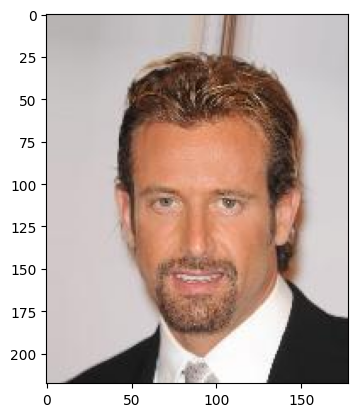

Success 000109.jpg


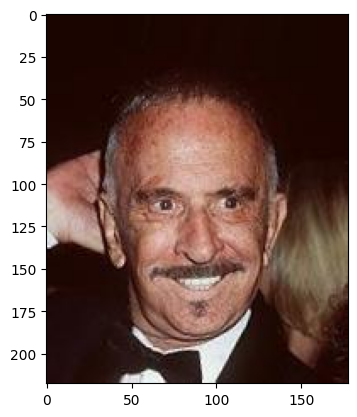

Success 000209.jpg


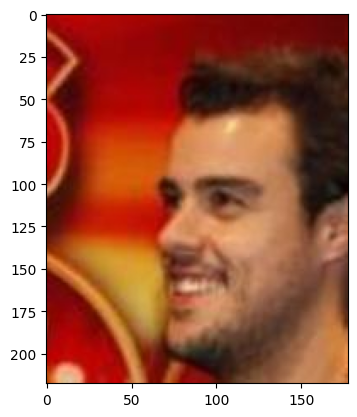

Success 000245.jpg
['000109.jpg', '000209.jpg', '000245.jpg']
Feature: Bald


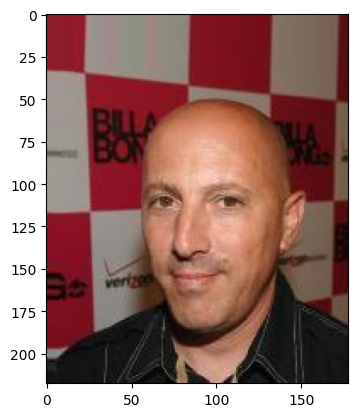

Success 000079.jpg


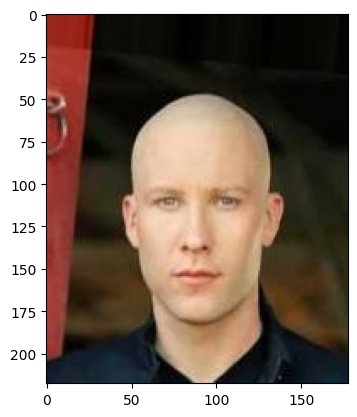

Success 000115.jpg


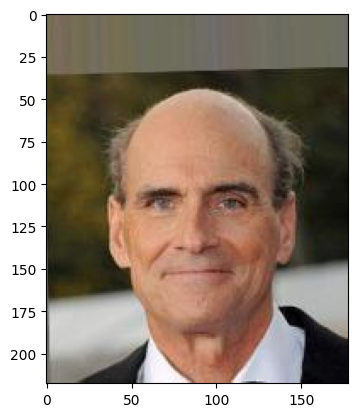

Success 000125.jpg
['000079.jpg', '000115.jpg', '000125.jpg']


<Figure size 640x480 with 0 Axes>

In [17]:
# Show images
from PIL import Image 
import cv2
import os

used_ids = []
img_folder_path = "/N/slate/tnn3/TruongChu/SRGAN/srgan-torch/data/img_align_celeba"

for feature, _ in attr_dist_bot3.items():
    indices = df_attr_nueva.loc[df_attr_nueva[feature] == 1]["image_id"]
    
    plot_ids = []

    print(f"Feature: {feature}")

    for id_plot in indices:
        if not id_plot in used_ids:
            used_ids.append(id_plot)
            
            try:
                im = Image.open(os.path.join(img_folder_path, id_plot))
                img = np.asarray(im)
                img_plot = plt.imshow(img)
                plt.show()
                plt.clf()
                #im.show()
                print("Success", id_plot)
                plot_ids.append(id_plot)
            except Exception as e:
                pass

        if len(plot_ids) >= 3:
            break

    print(plot_ids)

In [18]:
from PIL import Image


DATA_PATH = "/N/slate/tnn3/TruongChu/SRGAN/srgan-torch/data/img_align_celeba/000011.jpg"

im = Image.open(DATA_PATH)

print(im.size)

(178, 218)
